In [ ]:
# predict delivery time using sorting time
#delivery time-dependent
#sorting time-independent

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("F:\\excelR\\assignments\\linear regression\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
df=df.rename({'Delivery Time':'Delivery_Time'}, axis=1)
df=df.rename({'Sorting Time':'Sorting_Time'}, axis=1)

In [17]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

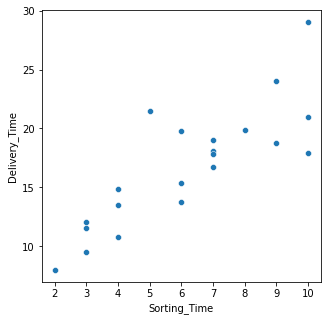

In [20]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Sorting_Time',y='Delivery_Time',data=df)

# correlation

In [21]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

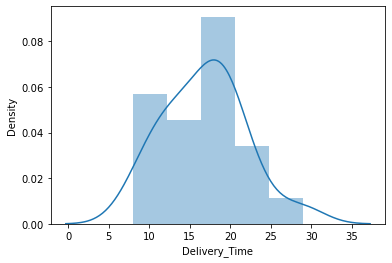

In [22]:
sns.distplot(df['Delivery_Time'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

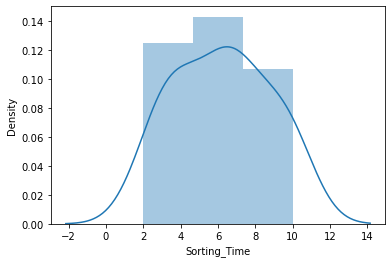

In [23]:
sns.distplot(df['Sorting_Time'])

In [24]:
import statsmodels.formula.api as smf

In [25]:
model=smf.ols('Delivery_Time ~ Sorting_Time',data=df).fit()

In [26]:
model

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

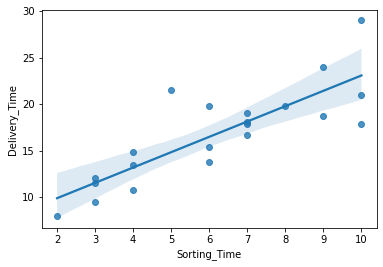

In [27]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=df)

In [28]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [29]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [30]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [31]:
df['predicted']=model.fittedvalues

In [32]:
df['errors']=model.resid

In [33]:
df

,Delivery_Time,Sorting_Time,predicted,errors
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [34]:
model.rsquared

0.6822714748417231

In [35]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [36]:
df['error sq']=(df['errors'])**2

In [37]:
df

,Delivery_Time,Sorting_Time,predicted,errors,error sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [40]:
df['error sq'].sum()

163.65954252026532